In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder   
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df = pd.read_csv('data.csv')
df

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,Wiraswasta,242912,SMA,9,Belum Pernah Menikah,Servis Lainnya,Perempuan,0.0,0.0,35.0,<=7jt
1,1,49,Wiraswasta,140782,10th,6,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,40.0,<=7jt
2,2,44,Wiraswasta,120057,D3,12,Menikah,Ekesekutif Managerial,Laki2,61404000.0,0.0,45.0,>7jt
3,3,24,Wiraswasta,194630,Sarjana,13,Belum Pernah Menikah,Spesialis,Laki2,0.0,0.0,35.0,<=7jt
4,4,33,Wiraswasta,219619,Master,14,Menikah,Spesialis,Laki2,210336000.0,0.0,40.0,>7jt
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35989,35989,47,Pekerja Bebas Bukan Perusahan,148169,SMA,9,Menikah,Perbaikan Kerajinan,Laki2,0.0,0.0,40.0,<=7jt
35990,35990,69,Pekerja Bebas Perusahaan,264722,D3,12,Menikah,Sales,Laki2,0.0,0.0,40.0,>7jt
35991,35991,24,Pekerja Bebas Bukan Perusahan,31606,Sarjana,13,Menikah,Spesialis,Perempuan,0.0,0.0,20.0,>7jt
35992,35992,47,Wiraswasta,197836,SMA,9,Menikah,Sales,Laki2,0.0,0.0,45.0,<=7jt


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35994 entries, 0 to 35993
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     35994 non-null  int64  
 1   Umur                   35994 non-null  int64  
 2   Kelas Pekerja          35994 non-null  object 
 3   Berat Akhir            35994 non-null  int64  
 4   Pendidikan             35994 non-null  object 
 5   Jmlh Tahun Pendidikan  35994 non-null  int64  
 6   Status Perkawinan      35994 non-null  object 
 7   Pekerjaan              35994 non-null  object 
 8   Jenis Kelamin          35994 non-null  object 
 9   Keuntungan Kapital     35994 non-null  float64
 10  Kerugian Capital       35994 non-null  float64
 11  Jam per Minggu         35994 non-null  float64
 12  Gaji                   35994 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 3.6+ MB


In [4]:
df.isnull().sum()

id                       0
Umur                     0
Kelas Pekerja            0
Berat Akhir              0
Pendidikan               0
Jmlh Tahun Pendidikan    0
Status Perkawinan        0
Pekerjaan                0
Jenis Kelamin            0
Keuntungan Kapital       0
Kerugian Capital         0
Jam per Minggu           0
Gaji                     0
dtype: int64

In [5]:
df['Pekerjaan'].value_counts()

Spesialis                4587
Perbaikan Kerajinan      4507
Ekesekutif Managerial    4481
Pemuka Agama             4158
Sales                    4044
Servis Lainnya           3615
Mesin Inspeksi           2250
?                        2069
Supir                    1741
Pembersih                1540
Petani                   1076
Tech-support             1042
Penjaga                   686
Asisten Rumah Tangga      187
Tentara                    11
Name: Pekerjaan, dtype: int64

In [6]:
df['Kelas Pekerja'].value_counts()

Wiraswasta                       24948
Pekerja Bebas Bukan Perusahan     2866
Pemerintah Lokal                  2280
?                                 2063
Pemerintah Negara                 1477
Pekerja Bebas Perusahaan          1273
Pemerintah Provinsi               1066
Tanpa di Bayar                      15
Tidak Pernah Bekerja                 6
Name: Kelas Pekerja, dtype: int64

In [7]:
df.replace(to_replace='?', value='Tidak Tetap', inplace=True)

In [21]:
df.describe()

,id,Umur,Berat Akhir,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
count,35994.000000,35994.000000,3.599400e+04,35994.000000,3.599400e+04,3.599400e+04,35994.000000
mean,17996.500000,38.664555,1.899318e+05,10.079874,1.503923e+07,1.217974e+06,40.435656
std,10390.717131,13.676266,1.058023e+05,2.574813,1.029919e+08,5.631544e+06,12.367552
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,8998.250000,28.000000,1.177670e+05,9.000000,0.000000e+00,0.000000e+00,40.000000
50%,17996.500000,37.000000,1.784665e+05,10.000000,0.000000e+00,0.000000e+00,40.000000
75%,26994.750000,48.000000,2.379185e+05,12.000000,0.000000e+00,0.000000e+00,45.000000
max,35993.000000,90.000000,1.490400e+06,16.000000,1.399986e+09,6.098400e+07,99.000000


In [22]:
df.describe(include = 'O')    

,Kelas Pekerja,Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Gaji
count,35994,35994,35994,35994,35994,35994
unique,9,16,6,15,2,2
top,Wiraswasta,SMA,Menikah,Spesialis,Laki2,<=7jt
freq,24948,11666,16559,4587,24094,27364


In [23]:
df['Kelas Pekerja'].value_counts()

Wiraswasta                       24948
Pekerja Bebas Bukan Perusahan     2866
Pemerintah Lokal                  2280
Tidak Tetap                       2063
Pemerintah Negara                 1477
Pekerja Bebas Perusahaan          1273
Pemerintah Provinsi               1066
Tanpa di Bayar                      15
Tidak Pernah Bekerja                 6
Name: Kelas Pekerja, dtype: int64

In [24]:
df['Pekerjaan'].value_counts()

Spesialis                4587
Perbaikan Kerajinan      4507
Ekesekutif Managerial    4481
Pemuka Agama             4158
Sales                    4044
Servis Lainnya           3615
Mesin Inspeksi           2250
Tidak Tetap              2069
Supir                    1741
Pembersih                1540
Petani                   1076
Tech-support             1042
Penjaga                   686
Asisten Rumah Tangga      187
Tentara                    11
Name: Pekerjaan, dtype: int64

In [25]:
df.dropna(0 , how = 'all')

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,Wiraswasta,242912,SMA,9,Belum Pernah Menikah,Servis Lainnya,Perempuan,0.0,0.0,35.0,<=7jt
1,1,49,Wiraswasta,140782,10th,6,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,40.0,<=7jt
2,2,44,Wiraswasta,120057,D3,12,Menikah,Ekesekutif Managerial,Laki2,61404000.0,0.0,45.0,>7jt
3,3,24,Wiraswasta,194630,Sarjana,13,Belum Pernah Menikah,Spesialis,Laki2,0.0,0.0,35.0,<=7jt
4,4,33,Wiraswasta,219619,Master,14,Menikah,Spesialis,Laki2,210336000.0,0.0,40.0,>7jt
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35989,35989,47,Pekerja Bebas Bukan Perusahan,148169,SMA,9,Menikah,Perbaikan Kerajinan,Laki2,0.0,0.0,40.0,<=7jt
35990,35990,69,Pekerja Bebas Perusahaan,264722,D3,12,Menikah,Sales,Laki2,0.0,0.0,40.0,>7jt
35991,35991,24,Pekerja Bebas Bukan Perusahan,31606,Sarjana,13,Menikah,Spesialis,Perempuan,0.0,0.0,20.0,>7jt
35992,35992,47,Wiraswasta,197836,SMA,9,Menikah,Sales,Laki2,0.0,0.0,45.0,<=7jt


In [26]:
df100 = df.head(1000)

In [27]:
df100.describe()

,id,Umur,Berat Akhir,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000
mean,499.500000,39.214000,189334.335000,10.083000,1.658157e+07,1.105342e+06,40.584000
std,288.819436,13.900411,101321.139832,2.715416,1.067459e+08,5.353462e+06,11.870714
min,0.000000,17.000000,19302.000000,1.000000,0.000000e+00,0.000000e+00,2.000000
25%,249.750000,29.000000,120395.250000,9.000000,0.000000e+00,0.000000e+00,40.000000
50%,499.500000,37.000000,179810.000000,10.000000,0.000000e+00,0.000000e+00,40.000000
75%,749.250000,48.000000,234998.750000,13.000000,0.000000e+00,0.000000e+00,45.000000
max,999.000000,90.000000,882849.000000,16.000000,1.399986e+09,3.855600e+07,99.000000


In [28]:
df100.describe(include = 'O')

,Kelas Pekerja,Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Gaji
count,1000,1000,1000,1000,1000,1000
unique,7,16,6,15,2,2
top,Wiraswasta,SMA,Menikah,Perbaikan Kerajinan,Laki2,<=7jt
freq,720,301,453,130,692,760


In [29]:
df100['Kelas Pekerja'].value_counts()

Wiraswasta                       720
Pekerja Bebas Bukan Perusahan     80
Pemerintah Lokal                  65
Tidak Tetap                       45
Pekerja Bebas Perusahaan          32
Pemerintah Provinsi               32
Pemerintah Negara                 26
Name: Kelas Pekerja, dtype: int64

In [30]:
df100['Pekerjaan'].value_counts()

Perbaikan Kerajinan      130
Ekesekutif Managerial    127
Spesialis                126
Sales                    123
Pemuka Agama             118
Servis Lainnya            88
Mesin Inspeksi            64
Supir                     56
Pembersih                 47
Tidak Tetap               45
Petani                    26
Tech-support              25
Penjaga                   20
Asisten Rumah Tangga       4
Tentara                    1
Name: Pekerjaan, dtype: int64

                             id      Umur  Berat Akhir  Jmlh Tahun Pendidikan  \
id                     1.000000 -0.001326     0.000503               0.007473   
Umur                  -0.001326  1.000000    -0.077357               0.031740   
Berat Akhir            0.000503 -0.077357     1.000000              -0.040715   
Jmlh Tahun Pendidikan  0.007473  0.031740    -0.040715               1.000000   
Keuntungan Kapital     0.009452  0.078759     0.001944               0.121350   
Kerugian Capital      -0.002831  0.052011    -0.003807               0.081421   
Jam per Minggu         0.004061  0.070684    -0.009896               0.142300   

                       Keuntungan Kapital  Kerugian Capital  Jam per Minggu  
id                               0.009452         -0.002831        0.004061  
Umur                             0.078759          0.052011        0.070684  
Berat Akhir                      0.001944         -0.003807       -0.009896  
Jmlh Tahun Pendidikan            0.1213

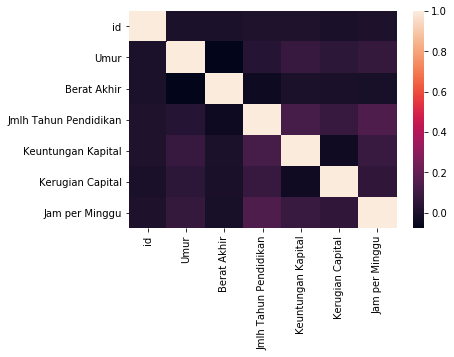

In [31]:
print(df.corr())
sns.heatmap(df.corr())

In [32]:
df_num = df[['Umur', 'Jmlh Tahun Pendidikan', 'Jam per Minggu', 'Keuntungan Kapital', 'Kerugian Capital']]
df_cat = df[['Kelas Pekerja', 'Pendidikan', 'Status Perkawinan', 'Pekerjaan', 'Jenis Kelamin', 'Gaji']]



<bound method DataFrame.corr of        Umur  Jmlh Tahun Pendidikan  Jam per Minggu  Keuntungan Kapital  \
0        21                      9            35.0                 0.0   
1        49                      6            40.0                 0.0   
2        44                     12            45.0          61404000.0   
3        24                     13            35.0                 0.0   
4        33                     14            40.0         210336000.0   
...     ...                    ...             ...                 ...   
35989    47                      9            40.0                 0.0   
35990    69                     12            40.0                 0.0   
35991    24                     13            20.0                 0.0   
35992    47                      9            45.0                 0.0   
35993    45                     13            60.0                 0.0   

       Kerugian Capital  
0                   0.0  
1                   0.0  
2

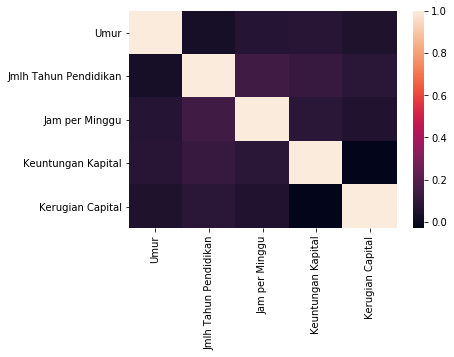

In [33]:
print(df_num.corr)
sns.heatmap(df_num.corr())

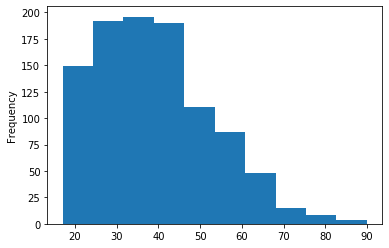

In [34]:
df100['Umur'].plot(kind = 'hist')

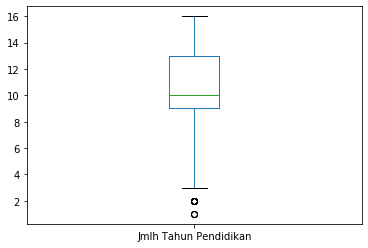

In [35]:
df100['Jmlh Tahun Pendidikan'].plot(kind = 'box')

Text(0.5, 1.0, 'Jumlah Pekerjaan')

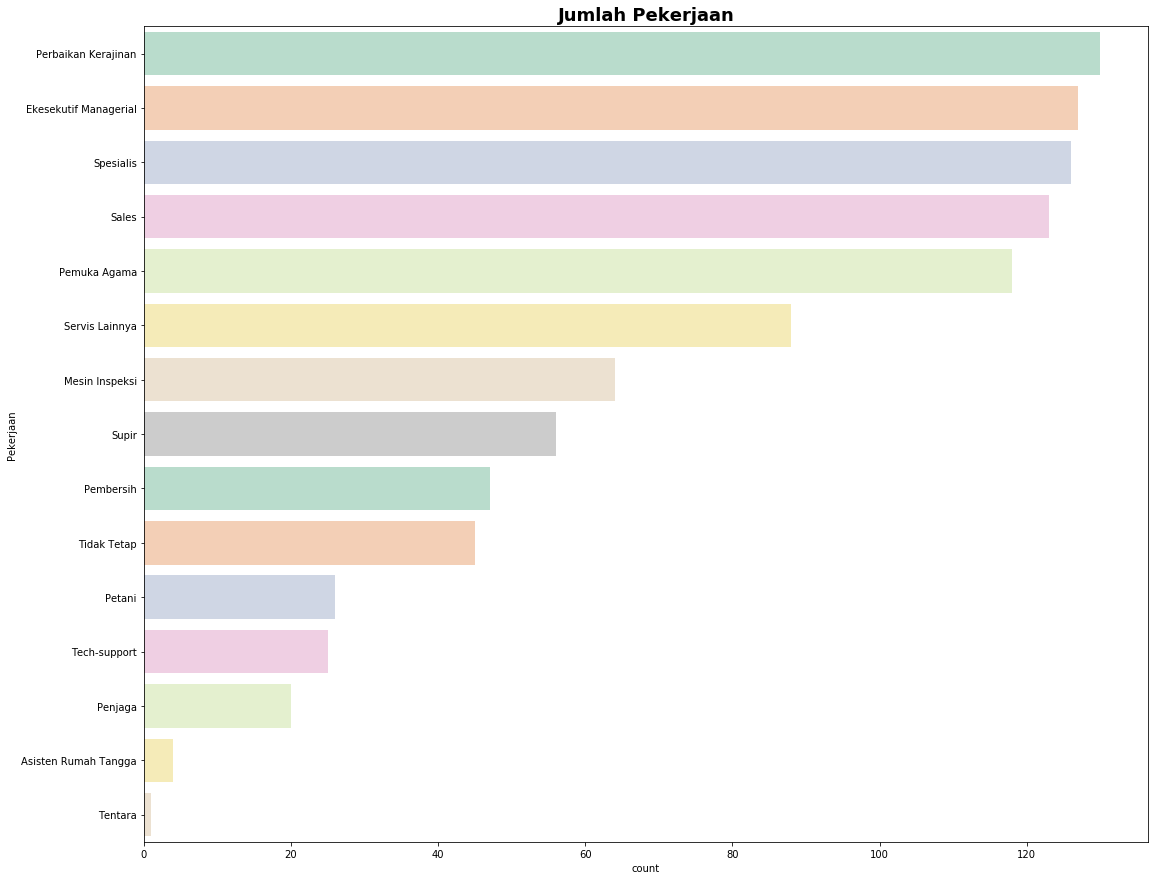

In [36]:
f, ax = plt.subplots (figsize=(18,15))
sns.countplot(y = "Pekerjaan",data=df100,
              order = ['Perbaikan Kerajinan', 'Ekesekutif Managerial', 'Spesialis', 'Sales', 'Pemuka Agama', 'Servis Lainnya', 'Mesin Inspeksi', 'Supir', 'Pembersih', 'Tidak Tetap', 'Petani', 'Tech-support', 'Penjaga', 'Asisten Rumah Tangga', 'Tentara'],
              palette='Pastel2').set_title('Jumlah Pekerjaan', weight = 'bold', fontsize=18)

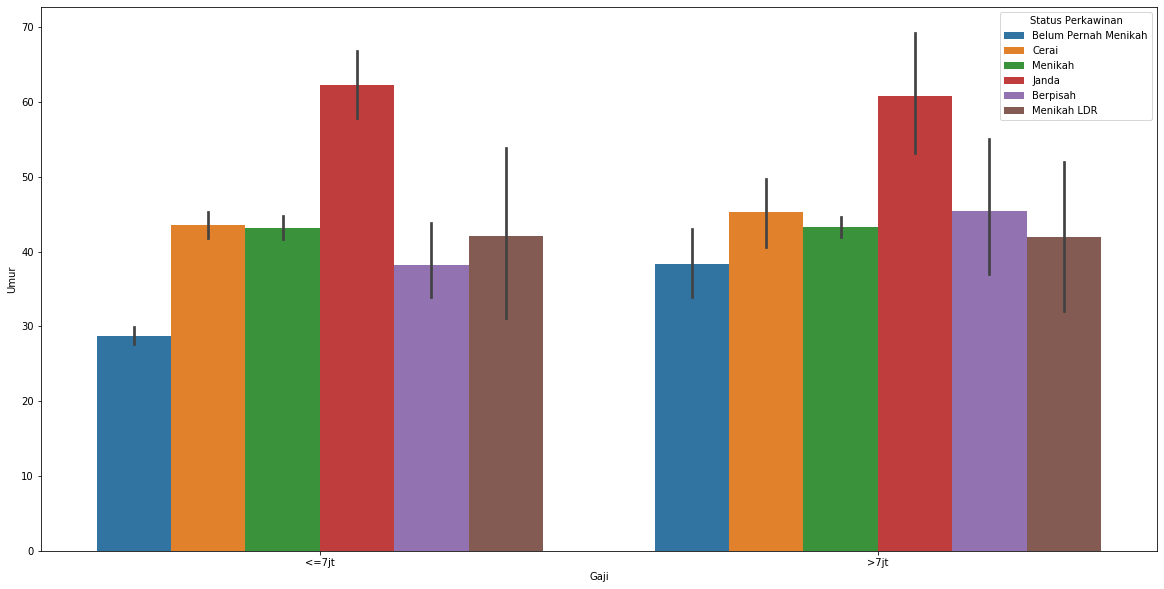

In [37]:
# sns.catplot(x='Gaji', y = 'Umur', hue='Kelas Pekerja', kind ='bar',
#             palette="pastel", edgecolor=".6", data=df )


f, ax = plt.subplots (figsize=(20,10))
sns.barplot(x='Gaji', y='Umur', hue='Status Perkawinan',data=df100)

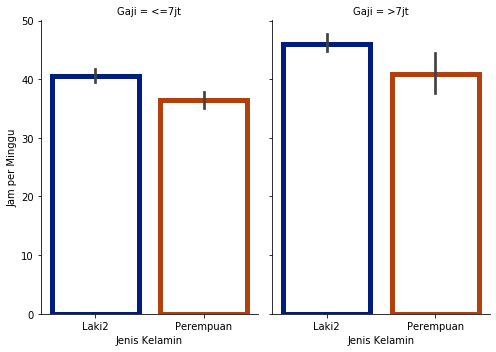

In [38]:
ax = sns.catplot(x='Jenis Kelamin', y='Jam per Minggu', facecolor=(0,0,0,0),
           col='Gaji', data=df100, kind='bar', height=5, aspect =.7,
           linewidth=5, edgecolor=sns.color_palette('dark', 3), order=['Laki2', 'Perempuan'])

In [39]:
df100['Status Perkawinan'].value_counts()  

Menikah                 453
Belum Pernah Menikah    339
Cerai                   125
Janda                    43
Berpisah                 31
Menikah LDR               9
Name: Status Perkawinan, dtype: int64

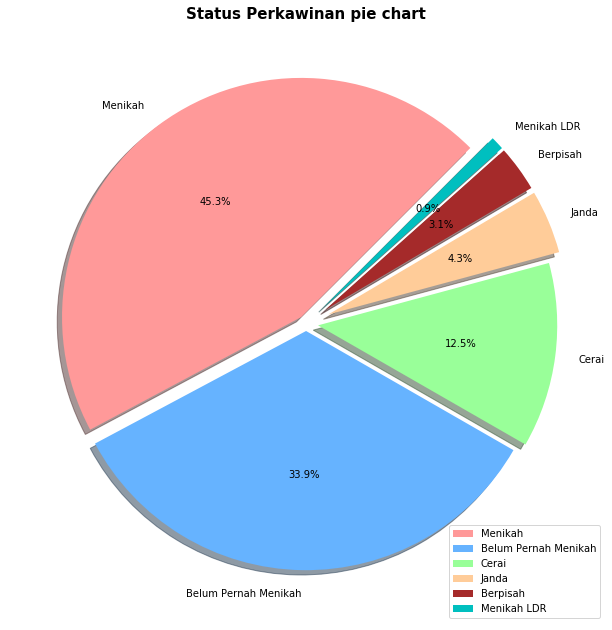

In [40]:
status = ['Menikah', 'Belum Pernah Menikah', 'Cerai', 'Janda', 'Berpisah', 'Menikah LDR']
jumlah = [453, 339, 125, 43, 31, 9]

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', 'brown', 'c']

explode = (0.035,0.03,0.05,0.1, 0.1 ,0.1)

fig, ax = plt.subplots(figsize=(15,11))

ax.pie(jumlah, colors = colors, labels = status, autopct= '%1.1f%%',
       explode= explode , shadow=True, startangle=45)
ax.legend(status, 
         loc ='lower right'
         )

ax.set_title('Status Perkawinan pie chart', fontsize = 15, weight ='bold')
 
plt.show()

In [41]:
df['Pendidikan'].value_counts()

SMA                     11666
Pendidikan Tinggi        8005
Sarjana                  5928
Master                   1944
D4                       1500
11th                     1315
D3                       1175
10th                     1024
7th-8th                   682
Sekolah Professional      622
9th                       570
12th                      478
Doktor                    451
5th-6th                   388
1st-4th                   184
SD                         62
Name: Pendidikan, dtype: int64

Text(0.5, 1.0, 'Pendidikan Berdasarkan Gaji')

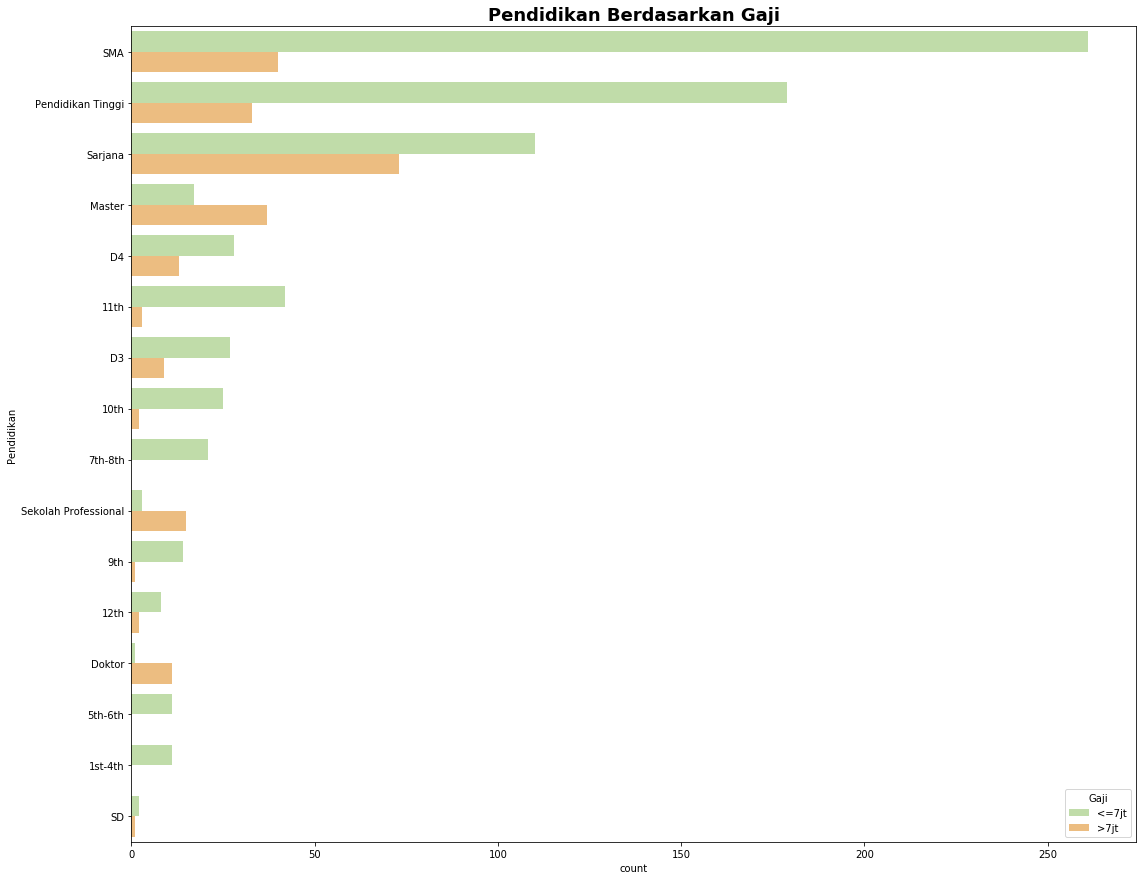

In [42]:
f, ax = plt.subplots (figsize=(18,15))
sns.countplot(y = "Pendidikan", hue = 'Gaji',
              order = ['SMA', 'Pendidikan Tinggi', 'Sarjana', 'Master', 'D4', '11th', 'D3', '10th', '7th-8th', 'Sekolah Professional', '9th', '12th', 'Doktor', '5th-6th', '1st-4th', 'SD']
              ,data=df100, palette='Spectral_r').set_title('Pendidikan Berdasarkan Gaji', weight = 'bold', fontsize=18)

In [43]:
df

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,Wiraswasta,242912,SMA,9,Belum Pernah Menikah,Servis Lainnya,Perempuan,0.0,0.0,35.0,<=7jt
1,1,49,Wiraswasta,140782,10th,6,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,40.0,<=7jt
2,2,44,Wiraswasta,120057,D3,12,Menikah,Ekesekutif Managerial,Laki2,61404000.0,0.0,45.0,>7jt
3,3,24,Wiraswasta,194630,Sarjana,13,Belum Pernah Menikah,Spesialis,Laki2,0.0,0.0,35.0,<=7jt
4,4,33,Wiraswasta,219619,Master,14,Menikah,Spesialis,Laki2,210336000.0,0.0,40.0,>7jt
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35989,35989,47,Pekerja Bebas Bukan Perusahan,148169,SMA,9,Menikah,Perbaikan Kerajinan,Laki2,0.0,0.0,40.0,<=7jt
35990,35990,69,Pekerja Bebas Perusahaan,264722,D3,12,Menikah,Sales,Laki2,0.0,0.0,40.0,>7jt
35991,35991,24,Pekerja Bebas Bukan Perusahan,31606,Sarjana,13,Menikah,Spesialis,Perempuan,0.0,0.0,20.0,>7jt
35992,35992,47,Wiraswasta,197836,SMA,9,Menikah,Sales,Laki2,0.0,0.0,45.0,<=7jt


In [44]:
# labelencoder = LabelEncoder()

# df['Pendidikan'] = labelencoder.fit_transform(df['Pendidikan'])
# df['Gaji'] = labelencoder.fit_transform(df['Gaji'])

In [45]:
pendidikan = {
    'Doktor': 16,
    'Master':15,
    'Sarjana':14,
    'D4':13,
    'D3':12,
    'Sekolah Professional':11,
    'Pendidikan Tinggi':10,
    'SMA':9,  
    '12th':8,
    '11th':7,
    '10th':6,
    '9th':5,
    '7th-8th':4,
    'SD':3,
    '5th-6th':2,
    '1st-4th':1,
    
}

df['Pendidikan'] = df['Pendidikan'].replace(pendidikan)

In [46]:
gaji = {
    '<=7jt': 0,
    '>7jt':1,
}

df['Gaji'] = df['Gaji'].replace(gaji)

In [47]:
df  

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,Wiraswasta,242912,9,9,Belum Pernah Menikah,Servis Lainnya,Perempuan,0.0,0.0,35.0,0
1,1,49,Wiraswasta,140782,6,6,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,40.0,0
2,2,44,Wiraswasta,120057,12,12,Menikah,Ekesekutif Managerial,Laki2,61404000.0,0.0,45.0,1
3,3,24,Wiraswasta,194630,14,13,Belum Pernah Menikah,Spesialis,Laki2,0.0,0.0,35.0,0
4,4,33,Wiraswasta,219619,15,14,Menikah,Spesialis,Laki2,210336000.0,0.0,40.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35989,35989,47,Pekerja Bebas Bukan Perusahan,148169,9,9,Menikah,Perbaikan Kerajinan,Laki2,0.0,0.0,40.0,0
35990,35990,69,Pekerja Bebas Perusahaan,264722,12,12,Menikah,Sales,Laki2,0.0,0.0,40.0,1
35991,35991,24,Pekerja Bebas Bukan Perusahan,31606,14,13,Menikah,Spesialis,Perempuan,0.0,0.0,20.0,1
35992,35992,47,Wiraswasta,197836,9,9,Menikah,Sales,Laki2,0.0,0.0,45.0,0


In [48]:
df = pd.get_dummies(df, columns = ['Kelas Pekerja', 'Status Perkawinan', 'Jenis Kelamin', 'Pekerjaan'])

In [49]:
df

,id,Umur,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji,Kelas Pekerja_Pekerja Bebas Bukan Perusahan,...,Pekerjaan_Penjaga,Pekerjaan_Perbaikan Kerajinan,Pekerjaan_Petani,Pekerjaan_Sales,Pekerjaan_Servis Lainnya,Pekerjaan_Spesialis,Pekerjaan_Supir,Pekerjaan_Tech-support,Pekerjaan_Tentara,Pekerjaan_Tidak Tetap
0,0,21,242912,9,9,0.0,0.0,35.0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,49,140782,6,6,0.0,0.0,40.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,44,120057,12,12,61404000.0,0.0,45.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,24,194630,14,13,0.0,0.0,35.0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4,33,219619,15,14,210336000.0,0.0,40.0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35989,35989,47,148169,9,9,0.0,0.0,40.0,0,1,...,0,1,0,0,0,0,0,0,0,0
35990,35990,69,264722,12,12,0.0,0.0,40.0,1,0,...,0,0,0,1,0,0,0,0,0,0
35991,35991,24,31606,14,13,0.0,0.0,20.0,1,1,...,0,0,0,0,0,1,0,0,0,0
35992,35992,47,197836,9,9,0.0,0.0,45.0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [50]:
X =  df.drop(['id', 'Berat Akhir', 'Gaji'], 1, inplace=False)
y = df['Gaji']

In [51]:
X

,Umur,Pendidikan,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Kelas Pekerja_Pekerja Bebas Bukan Perusahan,Kelas Pekerja_Pekerja Bebas Perusahaan,Kelas Pekerja_Pemerintah Lokal,Kelas Pekerja_Pemerintah Negara,...,Pekerjaan_Penjaga,Pekerjaan_Perbaikan Kerajinan,Pekerjaan_Petani,Pekerjaan_Sales,Pekerjaan_Servis Lainnya,Pekerjaan_Spesialis,Pekerjaan_Supir,Pekerjaan_Tech-support,Pekerjaan_Tentara,Pekerjaan_Tidak Tetap
0,21,9,9,0.0,0.0,35.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,49,6,6,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44,12,12,61404000.0,0.0,45.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,24,14,13,0.0,0.0,35.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,33,15,14,210336000.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35989,47,9,9,0.0,0.0,40.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
35990,69,12,12,0.0,0.0,40.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
35991,24,14,13,0.0,0.0,20.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
35992,47,9,9,0.0,0.0,45.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [52]:
y

0        0
1        0
2        1
3        0
4        1
        ..
35989    0
35990    1
35991    1
35992    0
35993    1
Name: Gaji, Length: 35994, dtype: int64

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X,y)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns=X.columns)
scaled_data.head()

,Umur,Pendidikan,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Kelas Pekerja_Pekerja Bebas Bukan Perusahan,Kelas Pekerja_Pekerja Bebas Perusahaan,Kelas Pekerja_Pemerintah Lokal,Kelas Pekerja_Pemerintah Negara,...,Pekerjaan_Penjaga,Pekerjaan_Perbaikan Kerajinan,Pekerjaan_Petani,Pekerjaan_Sales,Pekerjaan_Servis Lainnya,Pekerjaan_Spesialis,Pekerjaan_Supir,Pekerjaan_Tech-support,Pekerjaan_Tentara,Pekerjaan_Tidak Tetap
0,-1.291639,-0.451449,-0.419405,-0.146026,-0.21628,-0.439516,-0.294131,-0.191478,-0.260053,-0.206859,...,-0.139388,-0.378336,-0.175542,-0.355771,2.992799,-0.382165,-0.22545,-0.172662,-0.017484,-0.246956
1,0.755732,-1.492971,-1.584555,-0.146026,-0.21628,-0.035226,-0.294131,-0.191478,-0.260053,-0.206859,...,-0.139388,-0.378336,-0.175542,-0.355771,-0.334135,-0.382165,-0.22545,-0.172662,-0.017484,-0.246956
2,0.390130,0.590072,0.745744,0.450185,-0.21628,0.369063,-0.294131,-0.191478,-0.260053,-0.206859,...,-0.139388,-0.378336,-0.175542,-0.355771,-0.334135,-0.382165,-0.22545,-0.172662,-0.017484,-0.246956
3,-1.072278,1.284420,1.134128,-0.146026,-0.21628,-0.439516,-0.294131,-0.191478,-0.260053,-0.206859,...,-0.139388,-0.378336,-0.175542,-0.355771,-0.334135,2.616669,-0.22545,-0.172662,-0.017484,-0.246956
4,-0.414194,1.631594,1.522511,1.896261,-0.21628,-0.035226,-0.294131,-0.191478,-0.260053,-0.206859,...,-0.139388,-0.378336,-0.175542,-0.355771,-0.334135,2.616669,-0.22545,-0.172662,-0.017484,-0.246956


In [54]:
# from sklearn.preprocessing import MinMaxScaler

# min_max_scaler = MinMaxScaler()

# min_max_scaler.fit(X_train)

# X_train_scaled = min_max_scaler.transform(X_train)

# svc = svc(C=100)
# svc.fit(X_train_scaled, y)



In [55]:
new = scaled_data.head(1000)
new

,Umur,Pendidikan,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Kelas Pekerja_Pekerja Bebas Bukan Perusahan,Kelas Pekerja_Pekerja Bebas Perusahaan,Kelas Pekerja_Pemerintah Lokal,Kelas Pekerja_Pemerintah Negara,...,Pekerjaan_Penjaga,Pekerjaan_Perbaikan Kerajinan,Pekerjaan_Petani,Pekerjaan_Sales,Pekerjaan_Servis Lainnya,Pekerjaan_Spesialis,Pekerjaan_Supir,Pekerjaan_Tech-support,Pekerjaan_Tentara,Pekerjaan_Tidak Tetap
0,-1.291639,-0.451449,-0.419405,-0.146026,-0.21628,-0.439516,-0.294131,-0.191478,-0.260053,-0.206859,...,-0.139388,-0.378336,-0.175542,-0.355771,2.992799,-0.382165,-0.225450,-0.172662,-0.017484,-0.246956
1,0.755732,-1.492971,-1.584555,-0.146026,-0.21628,-0.035226,-0.294131,-0.191478,-0.260053,-0.206859,...,-0.139388,-0.378336,-0.175542,-0.355771,-0.334135,-0.382165,-0.225450,-0.172662,-0.017484,-0.246956
2,0.390130,0.590072,0.745744,0.450185,-0.21628,0.369063,-0.294131,-0.191478,-0.260053,-0.206859,...,-0.139388,-0.378336,-0.175542,-0.355771,-0.334135,-0.382165,-0.225450,-0.172662,-0.017484,-0.246956
3,-1.072278,1.284420,1.134128,-0.146026,-0.21628,-0.439516,-0.294131,-0.191478,-0.260053,-0.206859,...,-0.139388,-0.378336,-0.175542,-0.355771,-0.334135,2.616669,-0.225450,-0.172662,-0.017484,-0.246956
4,-0.414194,1.631594,1.522511,1.896261,-0.21628,-0.035226,-0.294131,-0.191478,-0.260053,-0.206859,...,-0.139388,-0.378336,-0.175542,-0.355771,-0.334135,2.616669,-0.225450,-0.172662,-0.017484,-0.246956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.852917,0.242898,1.910894,-0.146026,-0.21628,-0.035226,-0.294131,-0.191478,-0.260053,-0.206859,...,-0.139388,-0.378336,-0.175542,-0.355771,-0.334135,-0.382165,-0.225450,-0.172662,-0.017484,-0.246956
996,-0.560435,-0.451449,-0.419405,0.557845,-0.21628,-0.439516,-0.294131,-0.191478,-0.260053,-0.206859,...,-0.139388,-0.378336,-0.175542,-0.355771,-0.334135,-0.382165,4.435575,-0.172662,-0.017484,-0.246956
997,-1.511000,-0.451449,-0.419405,-0.146026,-0.21628,-1.005521,-0.294131,-0.191478,-0.260053,-0.206859,...,-0.139388,-0.378336,-0.175542,-0.355771,2.992799,-0.382165,-0.225450,-0.172662,-0.017484,-0.246956
998,-1.218519,-0.104276,-0.031022,-0.146026,-0.21628,-0.035226,-0.294131,-0.191478,-0.260053,-0.206859,...,-0.139388,-0.378336,-0.175542,-0.355771,-0.334135,-0.382165,-0.225450,5.791648,-0.017484,-0.246956


In [56]:
y_new = y.head(1000)
y_new

0      0
1      0
2      1
3      0
4      1
      ..
995    0
996    1
997    0
998    0
999    0
Name: Gaji, Length: 1000, dtype: int64

In [57]:
scaled_data

,Umur,Pendidikan,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Kelas Pekerja_Pekerja Bebas Bukan Perusahan,Kelas Pekerja_Pekerja Bebas Perusahaan,Kelas Pekerja_Pemerintah Lokal,Kelas Pekerja_Pemerintah Negara,...,Pekerjaan_Penjaga,Pekerjaan_Perbaikan Kerajinan,Pekerjaan_Petani,Pekerjaan_Sales,Pekerjaan_Servis Lainnya,Pekerjaan_Spesialis,Pekerjaan_Supir,Pekerjaan_Tech-support,Pekerjaan_Tentara,Pekerjaan_Tidak Tetap
0,-1.291639,-0.451449,-0.419405,-0.146026,-0.21628,-0.439516,-0.294131,-0.191478,-0.260053,-0.206859,...,-0.139388,-0.378336,-0.175542,-0.355771,2.992799,-0.382165,-0.22545,-0.172662,-0.017484,-0.246956
1,0.755732,-1.492971,-1.584555,-0.146026,-0.21628,-0.035226,-0.294131,-0.191478,-0.260053,-0.206859,...,-0.139388,-0.378336,-0.175542,-0.355771,-0.334135,-0.382165,-0.22545,-0.172662,-0.017484,-0.246956
2,0.390130,0.590072,0.745744,0.450185,-0.21628,0.369063,-0.294131,-0.191478,-0.260053,-0.206859,...,-0.139388,-0.378336,-0.175542,-0.355771,-0.334135,-0.382165,-0.22545,-0.172662,-0.017484,-0.246956
3,-1.072278,1.284420,1.134128,-0.146026,-0.21628,-0.439516,-0.294131,-0.191478,-0.260053,-0.206859,...,-0.139388,-0.378336,-0.175542,-0.355771,-0.334135,2.616669,-0.22545,-0.172662,-0.017484,-0.246956
4,-0.414194,1.631594,1.522511,1.896261,-0.21628,-0.035226,-0.294131,-0.191478,-0.260053,-0.206859,...,-0.139388,-0.378336,-0.175542,-0.355771,-0.334135,2.616669,-0.22545,-0.172662,-0.017484,-0.246956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35989,0.609491,-0.451449,-0.419405,-0.146026,-0.21628,-0.035226,3.399848,-0.191478,-0.260053,-0.206859,...,-0.139388,2.643150,-0.175542,-0.355771,-0.334135,-0.382165,-0.22545,-0.172662,-0.017484,-0.246956
35990,2.218140,0.590072,0.745744,-0.146026,-0.21628,-0.035226,-0.294131,5.222542,-0.260053,-0.206859,...,-0.139388,-0.378336,-0.175542,2.810799,-0.334135,-0.382165,-0.22545,-0.172662,-0.017484,-0.246956
35991,-1.072278,1.284420,1.134128,-0.146026,-0.21628,-1.652384,3.399848,-0.191478,-0.260053,-0.206859,...,-0.139388,-0.378336,-0.175542,-0.355771,-0.334135,2.616669,-0.22545,-0.172662,-0.017484,-0.246956
35992,0.609491,-0.451449,-0.419405,-0.146026,-0.21628,0.369063,-0.294131,-0.191478,-0.260053,-0.206859,...,-0.139388,-0.378336,-0.175542,2.810799,-0.334135,-0.382165,-0.22545,-0.172662,-0.017484,-0.246956


In [58]:
y

0        0
1        0
2        1
3        0
4        1
        ..
35989    0
35990    1
35991    1
35992    0
35993    1
Name: Gaji, Length: 35994, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(new, y_new, test_size= 0.2, random_state=1)

In [60]:
X_train.shape

(800, 38)

In [61]:
x_test.shape

(200, 38)

In [62]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
svm.score(x_test, y_test)

0.87

In [64]:
y_predik = svm.predict(x_test)
y_predik

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0], dtype=int64)

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

print('Detail Classification Report :')
print() 
print(confusion_matrix(y_test, y_predik))
print()

print(classification_report(y_test, y_predik))

Detail Classification Report :

[[143   9]
 [ 17  31]]

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       152
           1       0.78      0.65      0.70        48

    accuracy                           0.87       200
   macro avg       0.83      0.79      0.81       200
weighted avg       0.87      0.87      0.87       200



In [66]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5, p=1, weights='uniform')
model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='uniform')

In [67]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm, X_train, y_train, cv = 5)
scores

array([0.825  , 0.8875 , 0.91875, 0.84375, 0.8625 ])

In [68]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_knn, X_train, y_train, cv = 5)
scores

array([0.8125 , 0.8375 , 0.85625, 0.80625, 0.8125 ])

In [69]:
y_pred_knn = model_knn.predict(x_test)
y_pred_knn

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0], dtype=int64)

In [70]:
model_knn.score(x_test, y_test)

0.86